
# Solving differential equations with fourth order Runge Kutta in Python

## Notebook written by Reid Wyde
## Last update: 8.6.19

## Sources: 

### https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/
### Adapted from code contributed by Prateek Bhindwar 
### more tests from http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html

  



In [180]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

In [181]:

#define the RK method for one step
# Finds value of y for a given x using step size h 
# and initial value y0 at x0. 

#given ts is time inputs, so it implicitly defines the step size
#given y0 is vector of equation initial conditions (pass in as a vector, even for singleton)
#given dydt is the vector valued function describing the derivatives


def rungeKutta(ts, y0, dydt): 

    ys = np.zeros((len(ts),len(y0)))
    ys[0] = y0
    y = y0
    
    for i in range(1,(len(ts))) :
        t0 = ts[i-1]
        t = ts[i]
        h = t-t0 
        k1 = h * dydt(t0, y) 
        k2 = h * dydt(t0 + 0.5 * h, y + 0.5 * k1) 
        k3 = h * dydt(t0 + 0.5 * h, y + 0.5 * k2) 
        k4 = h * dydt(t0 + h, y + k3) 
  
        # Update next value of y 
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
        ys[i] = y
   
    return ys




# Example 1
## solving the forward problem and returning a specific value of Y

In [190]:
def dydt(t, y): 
    return ((t - y)/2) 

# Drive
t0 = 0
tf = 2
y0 = [1]
h = 0.2
ts = np.linspace(t0,tf, (tf-t0)/h + 1)
ys = rungeKutta(ts, y0, dydt)

print('The value of y at '+ str(tf) + ' is: ' + str(ys[-1][0]))
  



The value of y at 2 is: 1.1036393232374955


C:\Users\Reid\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


# Example 2
## solving the forward problem for a set of time values

First-order equations Let's try a first-order ordinary differential equation (ODE), say: dy/dx+y=x,y(0)=1.

This has a closed-form solution y=x−1+2*exp(−x)

We are going to solve this numerically.

C:\Users\Reid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


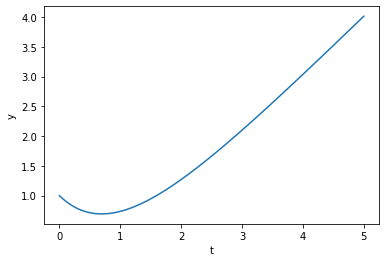

In [198]:
def dydt(t, y): 
    return t - y

#define x0, h, and t
t0 = 0
h = 0.01
tf = 5
ts = np.linspace(t0,tf,1+(tf-t0)/h)
y0 = [1]

ys = rungeKutta(ts, y0, dydt)


#graph

plt.xlabel("t")
plt.ylabel("y")
plt.plot(ts, ys);

## Error analysis
## comparing to the closed form solution

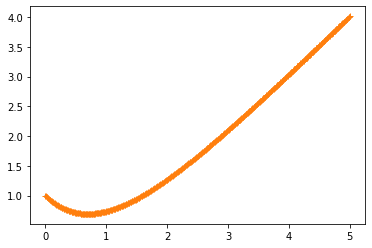

In [199]:
y_exact = ts - 1 + 2*np.exp(-xs)
y_exact = y_exact.reshape(y_exact.shape[0],1)
y_difference = ys - y_exact
plt.plot(ts, ys, ts, y_exact, "+");

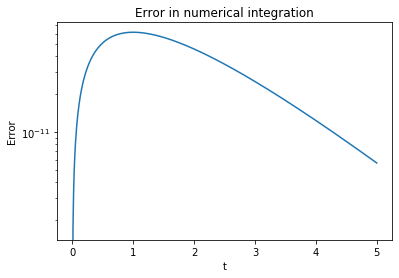

In [200]:
y_diff = np.abs(y_difference)

plt.semilogy(ts, y_diff)
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Error in numerical integration");
# Note the logarithmic scale on the y-axis. 

# Example 3

## Vector valued derivatives describing systems of differential equations

### Predator Prey

Predator-Prey Equations
Also known as Lotka-Volterra equations, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. For example, foxes (predators) and rabbits (prey). 

Let  x  and  y represent rabbit and fox populations, respectively. 

Then
dx/dt=x(a−by) 

dy/dt=−y(c−dx)
 
Here  a ,  b ,  c  and  d  are parameters, which are assumed to be positive

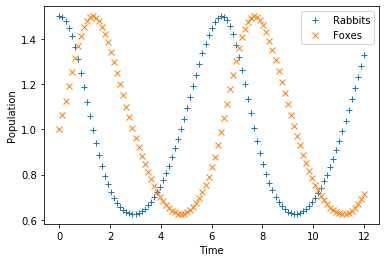

In [201]:
def dP_dt(t, P):
    a,b,c,d = 1,1,1,1
    return np.array([P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])])

ts = np.linspace(0, 12, 101)
P0 = np.array([1.5, 1.0])
#Ps = odeint(dP_dt, P0, ts)

Ps = rungeKutta(ts, P0, dP_dt)
prey = Ps[:,0]
predators = Ps[:,1]

plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();




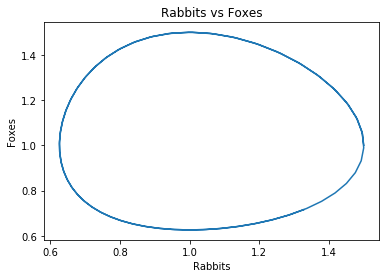

In [202]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

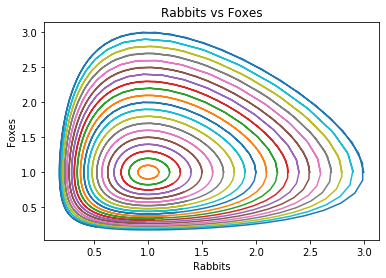

In [203]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    #Ps = odeint(dP_dt, P0, ts)
    Ps = rungeKutta(ts, P0, dP_dt)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");